In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
save_figs = True

In [3]:
import pandas  as pd
from cdcp.paths import DATA_DIR, ensure_dir
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pathlib2 import Path
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
from functools import reduce

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from cdcp.paths import DATA_PATH_MAGPI, FIGURE_DIR, ensure_dir
from cdcp.general import save_fig

In [6]:
statistics_timestamp = '2021-10-23_23-02-31_846685'# datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%f")#
statistics_timestamp

'2021-10-23_23-02-31_846685'

In [7]:
birds = [
    ('B1597', '2021-05-14_12-40-20_423998', 'kilosort2_5'),
    ('B1188', '2021-05-31_18-52-29_558216', 'kilosort2_5'),
    ('B1595', '2021-07-10_16-42-47_090257', 'kilosort2'),
    ('B1276', '2021-07-14_11-14-02_257025', 'kilosort2'),
    ('B1426', '2021-07-14_11-29-39_657273', 'kilosort2'),
    ('B1432', '2021-06-01_15-14-38_561892', 'kilosort2_5'),
    ('B1170', '2021-06-01_21-01-26_519005', 'kilosort2_5'),
    ('B1244', '2021-07-14_12-57-45_546674', 'kilosort2'),
    ('B1593', '2021-06-28_18-13-24_826008', 'kilosort2_5'),
    ('B1248', '2021-07-03_18-08-01_063431', 'kilosort2_5'),
    # acute
    #('B1279', '2021-04-12_16-27-07_289527', 'kilosort2_5'),
    #('B1500', '2021-08-27_09-24-48_680961', 'kilosort2_5'),
    #('B1239', '2021-05-17_22-18-51_557635', 'kilosort2'),
    #('B1459', '2021-08-26_21-21-12_755614', 'kilosort2_5'),
]
birds_df = pd.DataFrame(birds, columns = ['bird', 'timestamp', 'sorter']).set_index('bird')

In [8]:
identifiers = ['spike_count', 'unit_location']

In [9]:
all_unit_statistics_df= []
for bird, timestamp, sorter in tqdm(birds, desc='birds'):
    
    unit_statistics_df_list = []
    for identifier in identifiers:
        unit_statistics_df = pd.read_pickle(
        DATA_DIR
        / "unit_statistics"
        / statistics_timestamp
        / identifier
        / "{}.pickle".format(bird)
    )
        unit_statistics_df_list.append(unit_statistics_df)
        
    print(bird, 'nrows per', [len(i) for i in unit_statistics_df_list])
    
    # combine dfs
    unit_statistics_df = reduce(lambda x, y: pd.merge(x, y, on = 'unit', how='outer'), unit_statistics_df_list)
    unit_statistics_df['bird'] = bird
    
    all_unit_statistics_df.append(unit_statistics_df)
unit_statistics_df = pd.concat(all_unit_statistics_df)

birds: 100%|██████████| 10/10 [00:00<00:00, 45.46it/s]

B1597 nrows per [6750, 8711]
B1188 nrows per [510, 821]
B1595 nrows per [242, 325]
B1276 nrows per [46, 57]
B1426 nrows per [93, 180]
B1432 nrows per [2157, 2364]
B1170 nrows per [1281, 1693]
B1244 nrows per [141, 150]
B1593 nrows per [7714, 13260]
B1248 nrows per [8698, 13184]


In [10]:
# merge with categorical units
categorical_units_df = pd.read_pickle(DATA_DIR / 'categorical_unit_01_23_22.pickle')
categorical_units_df= categorical_units_df[categorical_units_df.categorical_unit == True]
unit_statistics_df_cat = pd.merge(unit_statistics_df, categorical_units_df, on = ['bird', 'unit'])
# subset categorical units
#unit_statistics_df_cat = unit_statistics_df_cat[unit_statistics_df_cat.categorical_unit == True]
unit_statistics_df = unit_statistics_df_cat
print(len(unit_statistics_df))

### merge with unit types
unit_type_df = pd.read_pickle(DATA_DIR / "unit_classes_01_23_22.pickle")
#unit_type_df = unit_type_df[["nuclei","AP","ML","DV","amplitude","template_amplitude","sr","fw","hw","bird","unit"]]
unit_statistics_df_ut = pd.merge(unit_statistics_df, unit_type_df, on = ['bird', 'unit'])
unit_statistics_df = unit_statistics_df_ut
print(len(unit_statistics_df))

6754
6754


In [11]:
unit_statistics_df.sort_values(by=['n_active_trials'], ascending=False)[:10]

,n_trials,n_cued_trials,n_incorrect_trials,n_correct_trials,n_reward_trials,n_passive_trials,n_active_trials,n_spikes,unit,hemisphere,labeled_region,estimated_nuclei,distance_to_estimated_nuclei,ML,AP,DV,bird,categorical_unit,categoricality,fw,sr,unit_type,best_chan_templates,best_chan_templates_norm,amplitude
1185,135308,22462,2952,21969,7852,108288,27020,3782468,3428,NaN,NaN,NCL,494.54,2731.25,2420.0,-802.499502,B1597,True,0.499018,43.0,25.960996,1,"[14.0, 13.911411411411411, 13.822822822822824,...","[0.01709673880257429, 0.0169885548054323, 0.01...",-560.25
188,62396,16809,1337,17917,5211,42386,20010,1519167,11670,NaN,NaN,Field_L,558.515,2317.25,2420.0,-722.499502,B1597,True,0.433930,85.0,15.855983,0,"[46.5, 46.588588588588586, 46.67717717717718, ...","[0.08471652194211443, 0.08487791800897435, 0.0...",-447.00
1491,76269,14628,1115,15112,4884,58687,17582,685073,8542,NaN,NaN,CMM,206.529,1744.25,2420.0,-822.499502,B1597,True,0.334104,136.0,7.016657,2,"[41.0, 41.05905905905906, 41.11811811811812, 4...","[0.10776401314984589, 0.10791924342343266, 0.1...",-297.00
1242,93739,14037,1970,13145,4812,76746,16993,1856368,4957,NaN,NaN,Field_L,503.611,2344.25,2420.0,-822.499502,B1597,True,0.417875,79.0,16.417635,1,"[29.0, 28.94094094094094, 28.88188188188188, 2...","[0.052354705797310976, 0.05224808442966604, 0....",-399.00
869,47304,13678,990,14831,4362,31087,16217,523151,12143,NaN,NaN,CMM,211.15,1724.25,2420.0,-762.499502,B1597,True,0.233959,117.0,8.676187,2,"[46.0, 46.11811811811812, 46.23623623623624, 4...","[0.10391431150889328, 0.10418114113761004, 0.1...",-331.25
551,41713,13300,983,14487,4235,25899,15814,711206,12465,NaN,NaN,Field_L,503.611,2344.25,2420.0,-822.499502,B1597,True,0.407077,81.0,12.319936,1,"[33.5, 33.411411411411414, 33.32282282282282, ...","[0.06139228489586343, 0.06122993695947081, 0.0...",-407.00
1029,74986,11721,1741,10893,4104,60776,14210,2953230,5596,NaN,NaN,CMM,136.645,1564.25,2420.0,-742.499502,B1597,True,0.206154,56.0,26.834717,1,"[36.5, 36.5, 36.5, 36.5, 36.5, 36.5, 36.5, 36....","[0.028925322359265853, 0.028925322359265853, 0...",-948.00
56,34841,11071,1110,11594,3230,21653,13188,300296,13097,NaN,NaN,CMM,276.871,1771.25,2420.0,-702.499502,B1597,True,0.230103,114.0,5.407564,0,"[43.0, 43.088588588588586, 43.17717717717718, ...","[0.08878614293789806, 0.08896906012601649, 0.0...",-348.00
2472,44588,10825,629,12123,3699,31675,12913,3829806,1292,NaN,NaN,CMM,48.558,691.25,2500.0,-1737.499504,B1432,True,0.463822,40.0,49.148696,1,"[34.0, 33.82282282282282, 33.645645645645644, ...","[0.03262357261064459, 0.03245356812521551, 0.0...",-664.00
2641,42203,10080,703,11317,3373,30104,12099,1086867,3566,NaN,NaN,CMM,44.546,724.25,2500.0,-1677.499504,B1432,True,0.449070,95.0,14.182488,0,"[48.0, 48.2952952952953, 48.590590590590594, 4...","[0.07154345393509884, 0.07198358821335323, 0.0...",-508.00


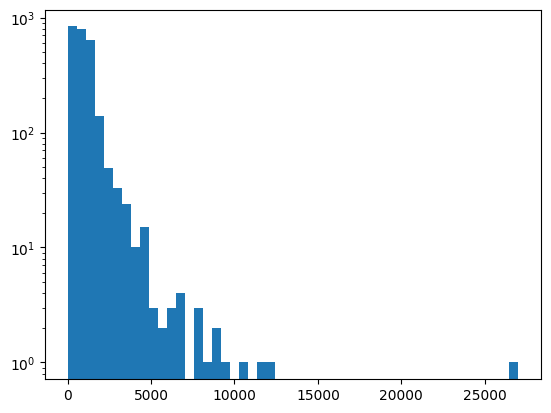

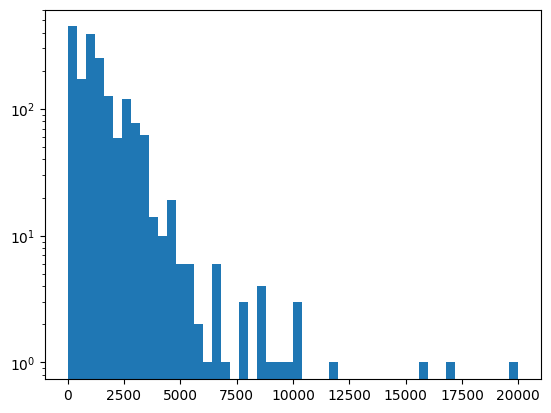

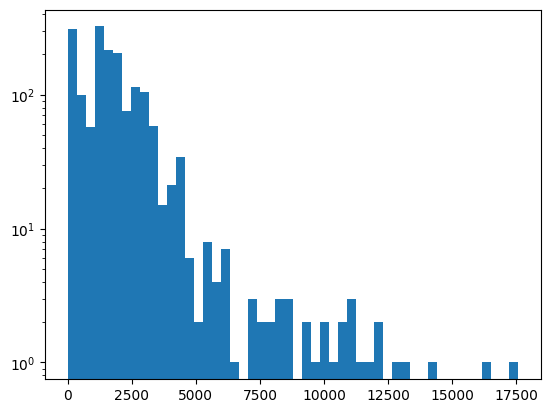

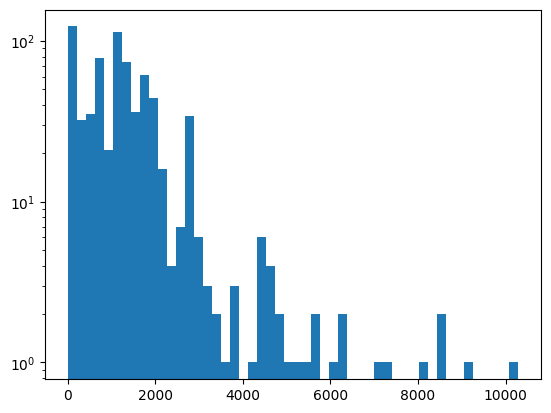

In [12]:
for estimated_nuclei in unit_statistics_df.estimated_nuclei.unique():
    plt.hist(unit_statistics_df[unit_statistics_df.estimated_nuclei == estimated_nuclei].n_active_trials.values, bins=50, log=True);
    plt.show()

### Get duration of each unit

In [31]:
unit_clusters = {
    bird: pd.read_pickle(
        DATA_DIR / "spikesorting" / "unit_clusters" / f"{row.bird}.pickle.zip"
    )
    for bird in unit_statistics_df.bird.unique()
}

In [32]:
recording_summary_df = {
    bird: pd.read_pickle(
        DATA_DIR / "spikesorting" / "recording_df" / f"{row.bird}.pickle.zip"
    )
    for bird in unit_statistics_df.bird.unique()
}

In [39]:
row.bird

'B1597'

In [41]:
row.unit

'3428'

In [45]:
# get the correct cluster for this unit
cluster_row = unit_clusters[bird][
    unit_clusters[bird].cluster_id == int(row.unit)
].iloc[0]

In [68]:
durations = []
for idx, row in tqdm(
    unit_statistics_df.iterrows(),
    total=len(unit_statistics_df),
):
    bird = row.bird

    # get the correct cluster for this unit
    try:
        cluster_row = unit_clusters[bird][
            unit_clusters[bird].cluster_id == int(row.unit)
        ].iloc[0]
    except:
        #print(row.bird ,row.unit, 'not found')
        durations.append(np.nan)
        continue
    # load the spikesorted data
    date_range = []
    trial_aligned_spikes = []
    for unit, recording_id in cluster_row.sort_units:
        date_range.append(
            recording_summary_df[bird][
                recording_summary_df[bird].recording_id == recording_id
            ].date_str.values
        )
    date_start = datetime.datetime.strptime(date_range[0][0], "%Y-%m-%d_%H-%M-%S_%f")
    date_end = datetime.datetime.strptime(date_range[-1][0], "%Y-%m-%d_%H-%M-%S_%f")
    durations.append(date_end - date_start)
unit_statistics_df["duration"] = durations

100%|██████████| 6754/6754 [00:09<00:00, 692.00it/s]


In [13]:
from scipy.ndimage import gaussian_filter1d
def get_psth_from_trial_aligned_spikes(
    trial_aligned_spikes, padding_s=0, nbins=200, gaussian_sigma_ms = 5
):
    bin_ms=1000 / nbins
    gaussian_sigma = gaussian_sigma_ms / bin_ms

    # get cue info
    trial_aligned_spikes["cue"] = [
        i.split("_")[0] for i in trial_aligned_spikes.stim.values
    ]
    trial_aligned_spikes["interp"] = [
        i.split("_")[1] for i in trial_aligned_spikes.stim.values
    ]
    trial_aligned_spikes["interp_point"] = [
        int(i.split("_")[2]) for i in trial_aligned_spikes.stim.values
    ]
    # align times
    trial_aligned_spikes.loc[
        trial_aligned_spikes.cue.isin(["CL1", "CL0", "CN", "CR0", "CR1"]),
        "stim_length",
    ] = 2
    trial_aligned_spikes.loc[trial_aligned_spikes.cue.isin(["NC"]), "stim_length"] = 1

    spike_psth = []
    for idx, row in tqdm(
        trial_aligned_spikes.iterrows(), total=len(trial_aligned_spikes), leave=False
    ):
        if row.cue in ["CL1", "CL0", "CN", "CR0", "CR1"]:
            bins = np.linspace(1, 2, nbins)
        else:
            bins = np.linspace(0, 1, nbins)

        # bins = np.linspace(-padding_s, row.stim_length + padding_s, nbins)
        hist, bin_edges = np.histogram(row.spike_times, bins, density=False)
        gauss_convolved_psth = gaussian_filter1d(
            hist.astype("float"), gaussian_sigma, mode="constant"
        )
        spike_psth.append(gauss_convolved_psth)

    trial_aligned_spikes["psth"] = spike_psth

    return trial_aligned_spikes

### plot stability of longest units

In [80]:
unit_statistics_df[unit_statistics_df.estimated_nuclei == estimated_nuclei] .sort_values(by="duration", ascending=False)[:10]

,n_trials,n_cued_trials,n_incorrect_trials,n_correct_trials,n_reward_trials,n_passive_trials,n_active_trials,n_spikes,unit,hemisphere,labeled_region,estimated_nuclei,distance_to_estimated_nuclei,ML,AP,DV,bird,categorical_unit,categoricality,fw,sr,unit_type,best_chan_templates,best_chan_templates_norm,amplitude,duration
1185,135308,22462,2952,21969,7852,108288,27020,3782468,3428,NaN,NaN,NCL,494.54,2731.25,2420.0,-802.499502,B1597,True,0.499018,43.0,25.960996,1,"[14.0, 13.911411411411411, 13.822822822822824,...","[0.01709673880257429, 0.0169885548054323, 0.01...",-560.25,22 days 00:58:15
3706,5365,859,124,744,309,4302,1063,95788,8046,NaN,NaN,NCL,34.026,-2308.75,1100.0,-432.499497,B1593,True,0.350295,125.0,8.488993,2,"[28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28....","[0.10072958004134046, 0.10072958004134046, 0.1...",-204.00,11 days 09:01:50
1591,72335,9960,1862,8973,3528,60386,11949,1914997,3687,NaN,NaN,NCL,607.179,2564.25,2420.0,-722.499502,B1597,True,0.367569,46.0,22.737649,1,"[14.0, 13.881881881881881, 13.763763763763764,...","[0.022558592096105473, 0.022368265064263596, 0...",-420.00,11 days 08:44:07
328,54279,8888,1783,8287,3227,43589,10690,2086599,3719,NaN,NaN,NCL,411.062,2944.25,2420.0,-822.499502,B1597,True,0.458827,49.0,23.075470,1,"[18.0, 17.88188188188188, 17.763763763763762, ...","[0.026722443687376238, 0.026547087867383443, 0...",-474.50,8 days 14:41:48
3978,5360,873,147,714,272,4284,1076,21741,7721,NaN,NaN,NCL,54.578,-2729.75,1100.0,-312.499497,B1593,True,0.298776,119.0,2.066569,0,"[27.0, 27.05905905905906, 27.11811811811812, 2...","[0.09311630476058963, 0.09331998481030138, 0.0...",-216.00,8 days 14:13:46
1102,26434,3645,339,3619,1357,22003,4431,822068,9528,NaN,NaN,NCL,411.062,2944.25,2420.0,-822.499502,B1597,True,0.464898,52.0,23.823615,1,"[17.5, 17.47047047047047, 17.44094094094094, 1...","[0.02894793924451384, 0.028899092442985844, 0....",-420.50,5 days 12:46:10
1155,26261,3823,397,3773,1317,21578,4683,441880,10050,NaN,NaN,NCL,607.179,2564.25,2420.0,-742.499502,B1597,True,0.330883,56.0,17.753389,1,"[17.0, 16.822822822822822, 16.645645645645647,...","[0.03131944431637747, 0.030993027214334317, 0....",-390.50,5 days 12:11:46
1699,27346,4680,499,4715,1559,21578,5768,834040,10110,NaN,NaN,NCL,416.664,2910.25,2420.0,-682.499502,B1597,True,0.360521,58.0,27.747324,1,"[43.0, 42.94094094094094, 42.88188188188188, 4...","[0.033270250206501394, 0.03322455463273731, 0....",-988.00,5 days 00:39:16
1745,20822,3636,339,3619,1357,16403,4419,83494,9830,NaN,NaN,NCL,411.062,2944.25,2420.0,-822.499502,B1597,True,0.412458,56.0,2.978941,1,"[36.0, 35.852352352352355, 35.7047047047047, 3...","[0.032171193256608735, 0.03203924878420995, 0....",-824.50,4 days 23:24:52
4356,5551,962,135,911,211,4341,1210,19445,12143,NaN,NaN,NCL,35.31,-2275.75,1100.0,-372.499497,B1593,True,0.200503,136.0,2.982873,2,"[26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26....","[0.14689265536723164, 0.14689265536723164, 0.1...",-121.00,4 days 22:11:37


NCL B1597 3428


100%|██████████| 44/44 [00:00<00:00, 50.60it/s]


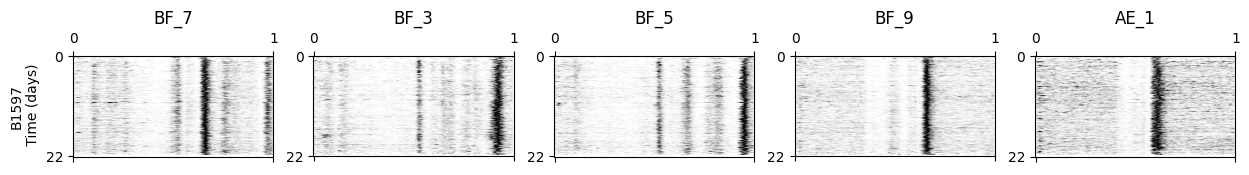

NCL B1593 3223


100%|██████████| 26/26 [00:00<00:00, 105.43it/s]


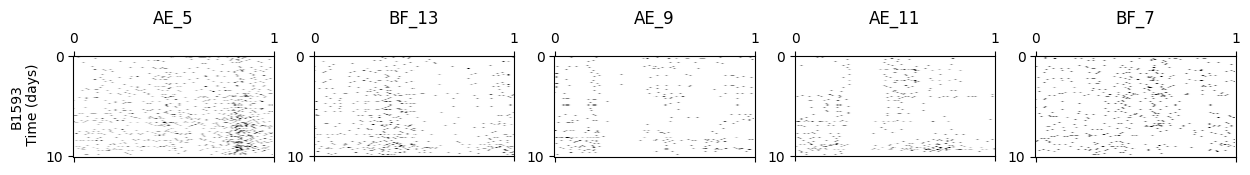

NCL B1597 3687


100%|██████████| 27/27 [00:00<00:00, 71.99it/s]


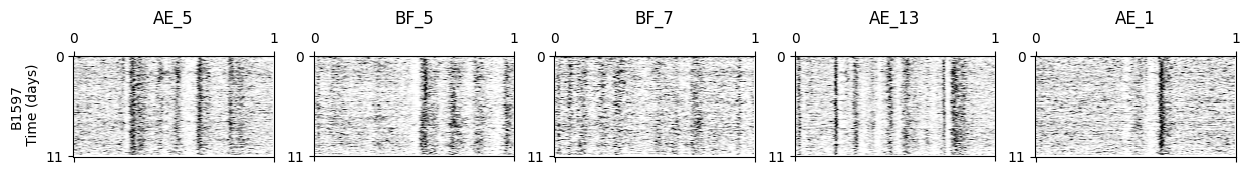

Field_L B1597 4957


100%|██████████| 33/33 [00:00<00:00, 74.93it/s]


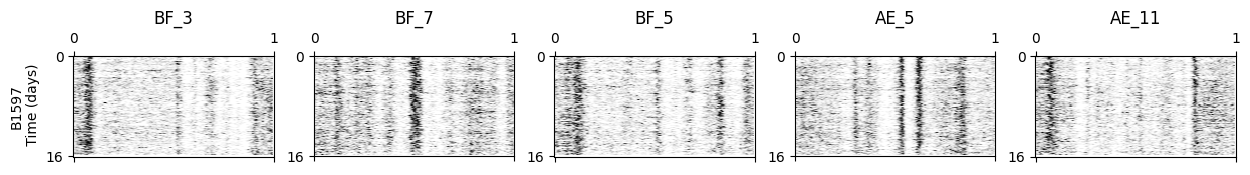

Field_L B1597 11670


100%|██████████| 13/13 [00:00<00:00, 43.48it/s]


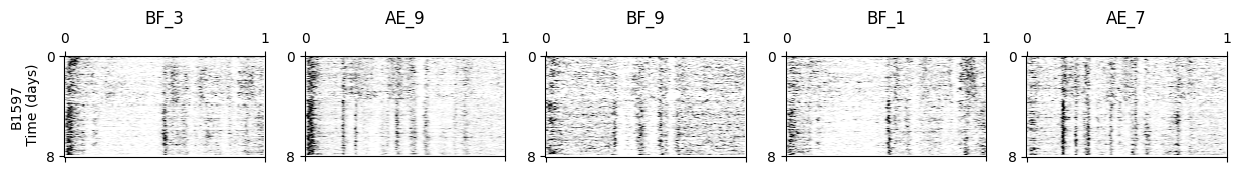

Field_L B1597 5698


100%|██████████| 23/23 [00:00<00:00, 51.75it/s]


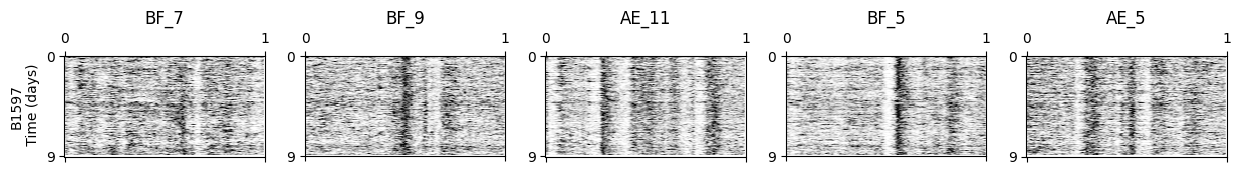

CMM B1597 8542


100%|██████████| 22/22 [00:00<00:00, 77.02it/s]


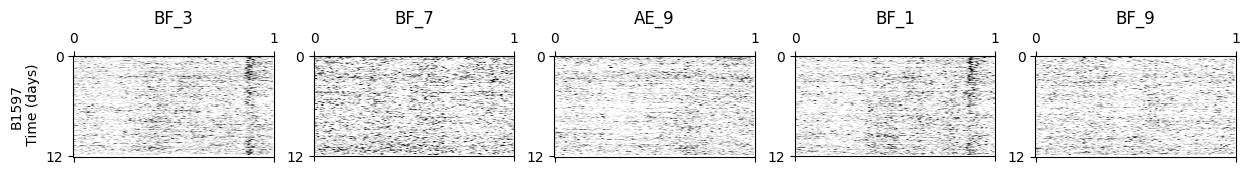

CMM B1597 5596


100%|██████████| 27/27 [00:00<00:00, 60.22it/s]


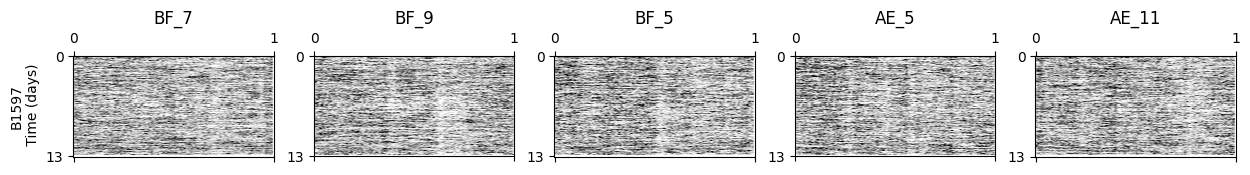

CMM B1597 8046


100%|██████████| 21/21 [00:00<00:00, 65.14it/s]


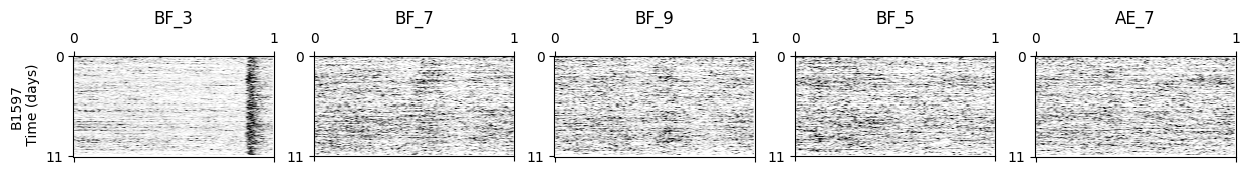

NCM B1593 2874


100%|██████████| 11/11 [00:00<00:00, 64.61it/s]


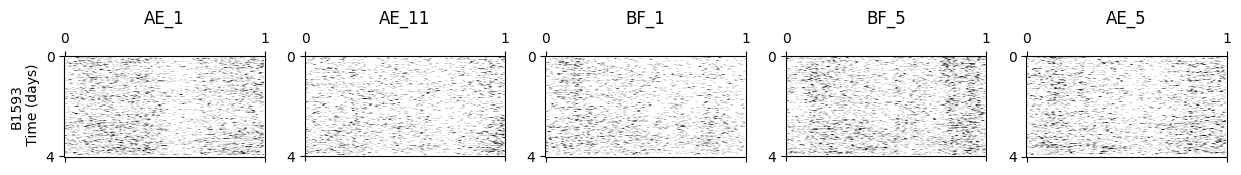

NCM B1248 4112


100%|██████████| 14/14 [00:00<00:00, 85.28it/s]


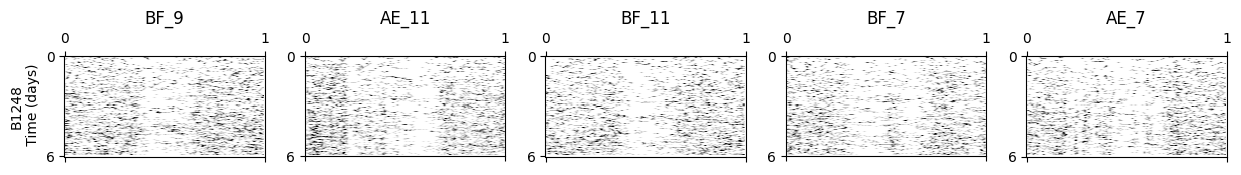

NCM B1593 3745


100%|██████████| 12/12 [00:00<00:00, 88.73it/s]


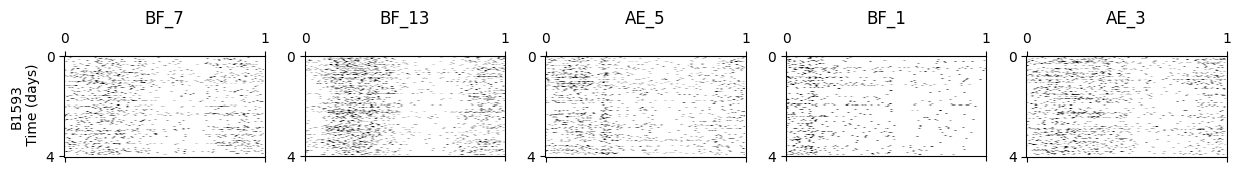

In [91]:
for estimated_nuclei in unit_statistics_df.estimated_nuclei.unique():
    for idx, row in (
        unit_statistics_df[unit_statistics_df.estimated_nuclei == estimated_nuclei]
        .sort_values(by="n_trials", ascending=False)[:3]
        .iterrows()
    ):
        print(estimated_nuclei, row.bird, row.unit)
        bird = row.bird
        rowunit = row.unit
        nuclei = row.estimated_nuclei
        # get spike features for each unit
        rfs_list = list(
            (DATA_DIR / "spikesorting" / "recording_features_merged_units").glob(
                f"{row.bird}*.pickle.zip"
            )
        )
        recording_features_merged_units = pd.concat(
            [pd.read_pickle(i) for i in rfs_list]
        )

        # get sort unit for each cluster
        unit_clusters = pd.read_pickle(
            DATA_DIR / "spikesorting" / "unit_clusters" / f"{row.bird}.pickle.zip"
        )

        # get the summary of recordings for the bird
        recording_summary_df = pd.read_pickle(
            DATA_DIR / "spikesorting" / "recording_df" / f"{row.bird}.pickle.zip"
        )

        # get the correct cluster for this unit
        cluster_row = unit_clusters[unit_clusters.cluster_id == int(row.unit)].iloc[0]

        # load the spikesorted data
        date_range = []
        trial_aligned_spikes = []
        for unit, recording_id in tqdm(cluster_row.sort_units):
            date_range.append(
                recording_summary_df[
                    recording_summary_df.recording_id == recording_id
                ].date_str.values
            )
            unit_file = (
                DATA_DIR
                / "spikesorting"
                / "trial_aligned_spikes_padding_100ms"
                / row.bird
                / recording_id
                / f"{unit}.pickle.zip"
            )
            try:
                trial_aligned_spikes.append(pd.read_pickle(unit_file))
            except:
                # no trials on this recording
                pass
        trial_aligned_spikes = pd.concat(trial_aligned_spikes).reset_index()

        ### Find the most common stimuli
        # create a df of common stimuli
        stim_df = pd.DataFrame(
            [i.split("_") for i in trial_aligned_spikes.stim.values],
            columns=["cue", "morph", "interpolation_point"],
        )
        stim_df["interpolation_point"] = stim_df.interpolation_point.astype(float)
        stim_df["interpolation_point_bin"] = np.digitize(
            stim_df.interpolation_point, np.linspace(0, 127, 16)
        )
        stim_df["stim"] = stim_df.apply(
            lambda r: "_".join([r["morph"], str(r["interpolation_point_bin"])]),
            axis=1,
        )
        stim_counts_df = pd.DataFrame(
            np.unique(stim_df.stim, return_counts=True)
        ).T.sort_values(by=1, ascending=False)
        stim_counts_df.columns = ["stim", "count"]
        # attach to spikesorted data
        trial_aligned_spikes["stim_bin"] = stim_df["stim"]

        date_start = datetime.datetime.strptime(
            date_range[0][0], "%Y-%m-%d_%H-%M-%S_%f"
        )
        date_end = datetime.datetime.strptime(date_range[-1][0], "%Y-%m-%d_%H-%M-%S_%f")

        nex = 5
        time_samples = 100
        fig, axs = plt.subplots(ncols=nex, figsize=(nex * 3, 3))

        for si, stim in enumerate(stim_counts_df.stim[:nex]):
            ax = axs.flatten()[si]

            # get spikesorted trials for this stimuli
            point_spikes = trial_aligned_spikes[trial_aligned_spikes.stim_bin == stim]

            # get psth
            point_spikes = get_psth_from_trial_aligned_spikes(point_spikes)
            samples = np.linspace(0, len(point_spikes) - 1, time_samples).astype(int)

            time_psth = []
            for sample_start, sample_end in zip(samples[:-1], samples[1:]):
                time_samp = point_spikes[sample_start:sample_end]
                if len(time_samp) ==0:
                    continue
                x = np.mean(time_samp["psth"].values, axis=0)
                x = x  / (1e-1+np.max(x))
                time_psth.append(x)
            ax.matshow(time_psth, cmap=plt.cm.Greys)
            ax.set_title(stim)
            ax.set_yticks([0, time_samples], [0, (date_end - date_start).days])
            ax.set_yticks([0, time_samples], [0, (date_end - date_start).days])

            axs[0].set_ylabel(f"{bird}\n Time (days)")
            ax.set_xticks([0, 199], [0, 1])

        ensure_dir(FIGURE_DIR / "stability")
        if save_figs:
            save_fig(
                FIGURE_DIR / "stability" / f"{idx}_{bird}_{rowunit}_{nuclei}",
                save_pdf=True,
            )
        plt.show()
    